# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [9]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from curtis_api_keys import weather_api_key
from curtis_api_keys import nrel_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (25, 50)
lng_range = (-70, -130)


## Generate Cities List

In [10]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


342

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [11]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
# query_url = f"{url}appid={weather_api_key}&units={units}&q={city}"

#create blank lists for data
returned_city=[]          
lat=[]           
lng=[]          
max_temp=[]      
humidity=[]     
cloudiness=[]    
wind_speed=[]    
country=[]       
date=[]          


# Loop through the list of cities and perform a request for data on each
count=0
missing=0
for city in cities:
    query_url = f"{url}appid={weather_api_key}&q={city}&units={units}"
    response = requests.get(query_url).json() 
#     print(response)
    try:
        
        returned_city.append(response['name'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        count+=1
        print(f'Processing Recored {count} of {len(cities)} | {city}') 
    except:
        missing+=1
        print(f'City not found. Skipping, total not found = {missing}')
#     if count>25:
#         break
    
#     time.sleep()
      

Processing Recored 1 of 342 | anahuac
Processing Recored 2 of 342 | pacific grove
Processing Recored 3 of 342 | lompoc
Processing Recored 4 of 342 | pontiac
Processing Recored 5 of 342 | safford
Processing Recored 6 of 342 | valdosta
Processing Recored 7 of 342 | guerrero negro
Processing Recored 8 of 342 | pacifica
Processing Recored 9 of 342 | monterey
Processing Recored 10 of 342 | ferme-neuve
Processing Recored 11 of 342 | saint-michel-des-saints
Processing Recored 12 of 342 | garden city
Processing Recored 13 of 342 | marsh harbour
Processing Recored 14 of 342 | valley city
Processing Recored 15 of 342 | atikokan
Processing Recored 16 of 342 | quebec
Processing Recored 17 of 342 | raymond
Processing Recored 18 of 342 | durham
Processing Recored 19 of 342 | nantucket
Processing Recored 20 of 342 | ontario
Processing Recored 21 of 342 | georgetown
Processing Recored 22 of 342 | grand island
Processing Recored 23 of 342 | oxford
Processing Recored 24 of 342 | nueva rosita
Processing 

Processing Recored 195 of 342 | grants pass
Processing Recored 196 of 342 | jerome
Processing Recored 197 of 342 | rockport
Processing Recored 198 of 342 | ojinaga
Processing Recored 199 of 342 | naica
Processing Recored 200 of 342 | worland
Processing Recored 201 of 342 | lyndon
Processing Recored 202 of 342 | kelso
Processing Recored 203 of 342 | cocorit
Processing Recored 204 of 342 | somerset
Processing Recored 205 of 342 | miles city
Processing Recored 206 of 342 | clarksburg
Processing Recored 207 of 342 | bolivar
Processing Recored 208 of 342 | fort thomas
Processing Recored 209 of 342 | marshall
Processing Recored 210 of 342 | huron
Processing Recored 211 of 342 | lake havasu city
Processing Recored 212 of 342 | fort erie
Processing Recored 213 of 342 | east moline
Processing Recored 214 of 342 | marion
Processing Recored 215 of 342 | general cepeda
Processing Recored 216 of 342 | espanola
Processing Recored 217 of 342 | seminole
Processing Recored 218 of 342 | little current
P

In [12]:
weather_dict={
    "City":returned_city,
    "Lat": lat,
    "Lng": lng,
    "Max_Temp":max_temp,
    "Humidity":humidity,
    "Cloudiness": cloudiness,
    "Wind_Speed": wind_speed,
    "Country":country,
    "Date":date
}
weather_data = pd.DataFrame(weather_dict)
weather_data.count()
weather_data=weather_data.round(1)
weather_data.to_csv('output_data/Exported_weather_data_test.csv')

In [20]:
weather_data.head()

,City,Lat,Lng,Max_Temp,Humidity,Cloudiness,Wind_Speed,Country,Date
0,Anáhuac,27.2,-100.2,34.0,49,20,4.6,MX,1596154850
1,Pacific Grove,36.6,-121.9,21.1,60,1,4.6,US,1596154630
2,Lompoc,34.6,-120.5,20.0,68,2,7.2,US,1596154748
3,Pontiac,42.6,-83.3,25.0,50,90,3.1,US,1596154850
4,Safford,32.8,-109.7,44.0,7,1,7.2,US,1596154851


In [19]:
##testing request
# url = "https://developer.nrel.gov/api/solar/solar_resource/v1.json?"
# query_url = f"{url}api_key={nrel_key}&lat=40&lon=105"
# response = requests.get(query_url).json() 
# response


In [15]:
# Save config information.
url = "https://developer.nrel.gov/api/solar/solar_resource/v1.json?"



#create blank lists for data
avg_dni_annual=[] 
avg_ghi_annual=[] 
avg_lat_tilt_annual=[] 
       
# lat=weather_data['Lat']
# lng=weather_data['Lng']

# Loop through the list of cities and perform a request for data on each based on lat/long
count=0
missing=0
for index, row in weather_data.iterrows():
    query_url = f"{url}api_key={nrel_key}&lat={row['Lat']}&lon={row['Lng']}"
#     query_url = f"{url}api_key={nrel_key}&lat={lat}&lon={lng}"
    response = requests.get(query_url).json() 
#     print(response)
#     if (count>10): break
    try:
        
        avg_dni_annual.append(response['outputs']['avg_dni']['annual'])
        avg_ghi_annual.append(response['outputs']['avg_dni']['annual'])
        avg_lat_tilt_annual.append(response['outputs']['avg_dni']['annual'])
        count+=1
        print(f"Processing Recored {count} of {len(cities)} | {row['City']}") 
    except:
        avg_dni_annual.append("")
        avg_ghi_annual.append("")
        avg_lat_tilt_annual.append("")
        missing+=1
        print(f"Solar data not found for {row['City']}. Skipping, total not found = {missing}")

    time.sleep(2)

Solar data not foundfor Anáhuac. Skipping, total not found = 1
Processing Recored 1 of 342 | Pacific Grove
Processing Recored 2 of 342 | Lompoc
Processing Recored 3 of 342 | Pontiac
Processing Recored 4 of 342 | Safford
Processing Recored 5 of 342 | Valdosta
Solar data not foundfor Guerrero Negro. Skipping, total not found = 2
Processing Recored 6 of 342 | Pacifica
Processing Recored 7 of 342 | Monterey
Solar data not foundfor Ferme-Neuve. Skipping, total not found = 3
Solar data not foundfor Saint-Michel-des-Saints. Skipping, total not found = 4
Processing Recored 8 of 342 | Garden City
Solar data not foundfor Marsh Harbour. Skipping, total not found = 5
Processing Recored 9 of 342 | Valley City
Solar data not foundfor Atikokan. Skipping, total not found = 6
Solar data not foundfor Québec. Skipping, total not found = 7
Processing Recored 10 of 342 | Raymond
Processing Recored 11 of 342 | Durham
Processing Recored 12 of 342 | Nantucket
Processing Recored 13 of 342 | Ontario
Solar data 

Processing Recored 122 of 342 | Atchison
Processing Recored 123 of 342 | Murray
Processing Recored 124 of 342 | Merrill
Processing Recored 125 of 342 | Eureka
Processing Recored 126 of 342 | Rupert
Processing Recored 127 of 342 | Owosso
Processing Recored 128 of 342 | Lavaca
Processing Recored 129 of 342 | Glenwood Springs
Solar data not foundfor Thunder Bay. Skipping, total not found = 50
Processing Recored 130 of 342 | Morgan City
Processing Recored 131 of 342 | Bastrop
Processing Recored 132 of 342 | Ottumwa
Solar data not foundfor Loreto. Skipping, total not found = 51
Processing Recored 133 of 342 | Artesia
Solar data not foundfor Mandeville. Skipping, total not found = 52
Processing Recored 134 of 342 | Edgewater
Processing Recored 135 of 342 | Brookings
Processing Recored 136 of 342 | Boulder
Solar data not foundfor Stuttgart. Skipping, total not found = 53
Solar data not foundfor Macamic. Skipping, total not found = 54
Processing Recored 137 of 342 | Olean
Processing Recored 13

In [18]:
#append weather dictionary with solar data
combined_dict={
    "City":returned_city,
    "Lat": lat,
    "Lng": lng,
    "Max_Temp":max_temp,
    "Humidity":humidity,
    "Cloudiness": cloudiness,
    "Wind_Speed": wind_speed,
    "Country":country,
    "Date":date,
    "Ave DNI":avg_dni_annual,
    "Ave GHI":avg_ghi_annual,
    "Ave Lat Tilt":avg_lat_tilt_annual  
    
}
combined_data = pd.DataFrame(combined_dict)
combined_data.count()
combined_data.to_csv('output_data/Exported_combined_data_test.csv')
combined_data.head()

,City,Lat,Lng,Max_Temp,Humidity,Cloudiness,Wind_Speed,Country,Date,Ave DNI,Ave GHI,Ave Lat Tilt
0,Anáhuac,27.23,-100.15,34.00,49,20,4.6,MX,1596154850,,,
1,Pacific Grove,36.62,-121.92,21.11,60,1,4.6,US,1596154630,5.15,5.15,5.15
2,Lompoc,34.64,-120.46,20.00,68,2,7.2,US,1596154748,6.33,6.33,6.33
3,Pontiac,42.64,-83.29,25.00,50,90,3.1,US,1596154850,3.64,3.64,3.64
4,Safford,32.83,-109.71,44.00,7,1,7.2,US,1596154851,7.64,7.64,7.64


In [34]:
# convert solar data to float
combined_data['Ave DNI']=pd.to_numeric(combined_data['Ave DNI'])
combined_data['Ave GHI']=pd.to_numeric(combined_data['Ave GHI'])
combined_data['Ave Lat Tilt']=pd.to_numeric(combined_data['Ave Lat Tilt'])
combined_data.dtypes

City             object
Lat             float64
Lng             float64
Max_Temp        float64
Humidity          int64
Cloudiness        int64
Wind_Speed      float64
Country          object
Date              int64
Ave DNI         float64
Ave GHI         float64
Ave Lat Tilt    float64
dtype: object

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [35]:
combined_data.describe()

,Lat,Lng,Max_Temp,Humidity,Cloudiness,Wind_Speed,Date,Ave DNI,Ave GHI,Ave Lat Tilt
count,336.000000,336.000000,336.000000,336.000000,336.000000,336.000000,3.360000e+02,240.000000,240.000000,240.000000
mean,38.018363,-87.258601,28.365804,54.622024,30.312500,3.691518,1.596155e+09,4.808417,4.808417,4.808417
std,10.880004,39.545794,6.286432,25.415179,34.693721,2.270852,9.459417e+01,1.076994,1.076994,1.076994
min,-33.870000,-127.420000,10.070000,1.000000,0.000000,0.450000,1.596154e+09,2.890000,2.890000,2.890000
25%,33.570000,-108.307500,24.000000,36.750000,1.000000,2.100000,1.596155e+09,3.990000,3.990000,3.990000
50%,39.920000,-93.270000,28.000000,58.000000,20.000000,3.305000,1.596155e+09,4.520000,4.520000,4.520000
75%,44.310000,-80.262500,31.752500,74.000000,66.250000,4.610000,1.596155e+09,5.475000,5.475000,5.475000
max,55.750000,153.420000,48.330000,100.000000,100.000000,24.960000,1.596155e+09,7.680000,7.680000,7.680000


In [ ]:
#  Get the indices of cities that have humidity over 100%.
print(f'Max humidity is {weather_data["Humidity"].max()}')

In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


In [ ]:
# Extract relevant fields from the data frame


# Export the City_Data into a csv


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

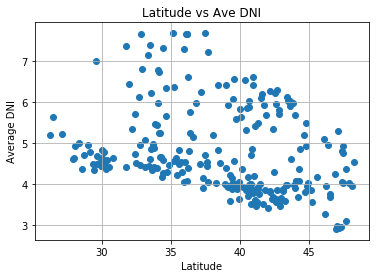

In [37]:
plt.scatter(combined_data["Lat"], combined_data["Ave DNI"])
plt.title('Latitude vs Ave DNI')
plt.xlabel('Latitude')
plt.ylabel('Average DNI')
plt.grid()
# plt.savefig('../output_data/Lat_vs_Temp.png')

## Latitude vs. Humidity Plot

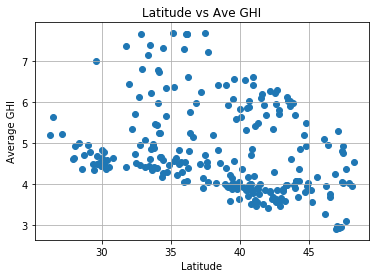

In [38]:
plt.scatter(combined_data["Lat"], combined_data["Ave GHI"])
plt.title('Latitude vs Ave GHI')
plt.xlabel('Latitude')
plt.ylabel('Average GHI')
plt.grid()

## Latitude vs. Cloudiness Plot

In [ ]:
plt.title('Latitude vs Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.grid()
plt.scatter(weather_data["Lat"], weather_data["Cloudiness"])
plt.savefig('../output_data/Lat_vs_Cloudiness.png')

## Latitude vs. Wind Speed Plot

In [ ]:
plt.title('Latitude vs Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.grid()
plt.scatter(weather_data["Lat"], weather_data["Wind_Speed"])
plt.savefig('../output_data/Lat_vs_Wind_Speed.png')

## Linear Regression

In [ ]:
# OPTIONAL: Create a function to create Linear Regression plots
plot_data=weather_data[['Max_Temp', 'Humidity', 'Cloudiness', 'Wind_Speed']]
yvalues=['Max_Temp', 'Humidity', 'Cloudiness', 'Wind_Speed']
north=weather_data.loc[(weather_data['Lat']>=0)]
xvalue=north['Lat']

#for loop here to change yvalue
for each_variable in yvalues:
    
    yvalue=north[each_variable]
    (slope, intercept, rvalue, pvalue, stderr) = linregress(xvalue, yvalue)
    regress_values = xvalue * slope + intercept
    line_eq = each_variable+"= " + str(round(slope,2)) + "*Lat +" + str(round(intercept,2))
    plt.scatter(xvalue,yvalue)
    plt.plot(xvalue,regress_values,"r-")
    plt.annotate(line_eq,(xvalue.min(),yvalue.min()),fontsize=15,color="red")
    plt.xlabel('Latitude')
    plt.ylabel(each_variable)
    plt.title(f'Northern Latitudes vs {each_variable}')
    print(f" the rsquared value is {rvalue**2}")
    plt.show()



In [ ]:
plot_data=weather_data[['Max_Temp', 'Humidity', 'Cloudiness', 'Wind_Speed']]
yvalues=['Max_Temp', 'Humidity', 'Cloudiness', 'Wind_Speed']
south=weather_data.loc[(weather_data['Lat']<=0)]
xvalue=south['Lat']

#for loop here to change yvalue
for each_variable in yvalues:
    
    yvalue=south[each_variable]
    (slope, intercept, rvalue, pvalue, stderr) = linregress(xvalue, yvalue)
    regress_values = xvalue * slope + intercept
    line_eq = each_variable+"= " + str(round(slope,2)) + "*Lat +" + str(round(intercept,2))
    plt.scatter(xvalue,yvalue)
    plt.plot(xvalue,regress_values,"r-")
    plt.annotate(line_eq,(xvalue.min(),yvalue.min()),fontsize=15,color="red")
    plt.xlabel('Latitude')
    plt.ylabel(each_variable)
    plt.title(f'Southern Latitudea vs {each_variable}')
    print(f" the rsquared value is {rvalue**2}")
    plt.show()

In [ ]:
# Create Northern and Southern Hemisphere DataFrames
north=weather_data.loc[(weather_data['Lat']>=0)]
xvaluen=north['Lat']
south=weather_data.loc[(weather_data['Lat']<0)]
xvalues=south['Lat']

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [ ]:
# plot_data=weather_data[['Max_Temp', 'Humidity', 'Cloudiness', 'Wind_Speed']]
# yvalues=['Max_Temp', 'Humidity', 'Cloudiness', 'Wind_Speed']
# north=weather_data.loc[(weather_data['Lat']>=0)]
# xvalue=north['Lat']

    
yvalue=north['Max_Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(xvaluen, yvalue)
regress_values = xvaluen * slope + intercept
line_eq = "Max Temp= " + str(round(slope,2)) + "*Lat +" + str(round(intercept,2))
plt.scatter(xvaluen,yvalue)
plt.plot(xvaluen,regress_values,"r-")
plt.annotate(line_eq,(xvaluen.min(),yvalue.min()),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.title(f'Northern Latitudes vs Max Temp')
print(f" the rsquared value is {rvalue**2}")
plt.savefig('../output_data/Northern_Lat_vs_Max_Temp.png')
plt.show()

print('For ever increase in Latitude towards the North Pole the Max Temp drop by a 1/4 of a degree')


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

In [ ]:
yvalue=south['Max_Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(xvalues, yvalue)
regress_values = xvalues * slope + intercept
line_eq = "Max Temp= " + str(round(slope,2)) + "*Lat +" + str(round(intercept,2))
plt.scatter(xvalues,yvalue)
plt.plot(xvalues,regress_values,"r-")
plt.annotate(line_eq,(xvalues.min(),yvalue.min()),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.title(f'Southern Latitudes vs Max Temp')
print(f" the rsquared value is {rvalue**2}")
plt.savefig('../output_data/Southern_Lat_vs_Max_Temp.png')
plt.show()

print('As you move towards the equater the Max Temp increases by almost 1/2 a degree for each Latitude')


####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [ ]:
yvalue=north['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(xvaluen, yvalue)
regress_values = xvaluen * slope + intercept
line_eq = "Humidity= " + str(round(slope,2)) + "*Lat +" + str(round(intercept,2))
plt.scatter(xvaluen,yvalue)
plt.plot(xvaluen,regress_values,"r-")
plt.annotate(line_eq,(xvaluen.min(),yvalue.min()),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title(f'Northern Latitudes vs Humidity')
print(f" the rsquared value is {rvalue**2}")
plt.savefig('../output_data/Northern_Lat_vs_Humidity.png')
plt.show()

print('Humidity and Latitude do not have a correlation')


####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [ ]:
yvalue=south['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(xvalues, yvalue)
regress_values = xvalues * slope + intercept
line_eq = "Humidity= " + str(round(slope,2)) + "*Lat +" + str(round(intercept,2))
plt.scatter(xvalues,yvalue)
plt.plot(xvalues,regress_values,"r-")
plt.annotate(line_eq,(xvalues.min(),yvalue.min()),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title(f'Southern Latitudes vs Humidity')
print(f" the rsquared value is {rvalue**2}")
plt.savefig('../output_data/Southern_Lat_vs_Humidity.png')
plt.show()

print('Humidity and Latitude do not have a correlation')


####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [ ]:
yvalue=north['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(xvaluen, yvalue)
regress_values = xvaluen * slope + intercept
line_eq = "Cloudiness= " + str(round(slope,2)) + "*Lat +" + str(round(intercept,2))
plt.scatter(xvaluen,yvalue)
plt.plot(xvaluen,regress_values,"r-")
plt.annotate(line_eq,(xvaluen.min(),12),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title(f'Northern Latitudes vs Cloudiness')
print(f" the rsquared value is {rvalue**2}")
plt.savefig('../output_data/Northern_Lat_vs_Cloudiness.png')
plt.show()

print('There is a slight decress in Cloudiness as you move North')


####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [ ]:
yvalue=south['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(xvalues, yvalue)
regress_values = xvalues * slope + intercept
line_eq = "Cloudiness= " + str(round(slope,2)) + "*Lat +" + str(round(intercept,2))
plt.scatter(xvalues,yvalue)
plt.plot(xvalues,regress_values,"r-")
plt.annotate(line_eq,(xvalues.min(),12),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title(f'Southern Latitudes vs Cloudiness')
print(f" the rsquared value is {rvalue**2}")
plt.savefig('../output_data/Southern_Lat_vs_Cloudiness.png')
plt.show()

print('Slight incress in % Cloudiness as you move towards the equator')


####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [ ]:
yvalue=north['Wind_Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(xvaluen, yvalue)
regress_values = xvaluen * slope + intercept
line_eq = "Wind Speed= " + str(round(slope,2)) + "*Lat +" + str(round(intercept,2))
plt.scatter(xvaluen,yvalue)
plt.plot(xvaluen,regress_values,"r-")
plt.annotate(line_eq,(xvaluen.min(),10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed(MPH)')
plt.title(f'Northern Latitudes vs Wind Speed(MPH)')
print(f" the rsquared value is {rvalue**2}")
plt.savefig('../output_data/Northern_Lat_vs_Wind_Speed.png')
plt.show()

print('There is very little correlation between Latitude and Wind Speed')


####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [ ]:
yvalue=south['Wind_Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(xvalues, yvalue)
regress_values = xvalues * slope + intercept
line_eq = "Wind Speed= " + str(round(slope,2)) + "*Lat +" + str(round(intercept,2))
plt.scatter(xvalues,yvalue)
plt.plot(xvalues,regress_values,"r-")
plt.annotate(line_eq,(xvalues.min(),10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed(MPH)')
plt.title(f'Southern Latitudes vs Wind Speed(MPH)')
print(f" the rsquared value is {rvalue**2}")
plt.savefig('../output_data/Southern_Lat_vs_Wind_Speed.png')
plt.show()

print('There is very little correlation between Latitude and Wind Speed')
